(156581, 17)
Termination criterion satisfied


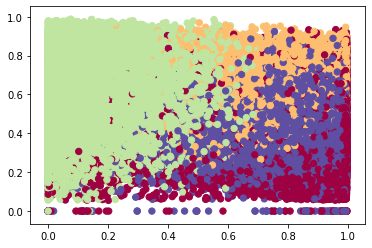

156581


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class KMeansClustering:
    def __init__(self, X, no_clusters):
        self.K = no_clusters
        self.max_iter = 400
        self.plotfigure = True
        self.no_examples = X.shape[0]
        self.no_features = X.shape[1]

    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.no_features))

        for k in range(self.K):
            centroid = X[np.random.choice(range(self.no_examples))]
            centroids[k] = centroid

        return centroids

    def create_clusters(self, X, centroids):
        # Will contain a list of the points that are associated with that specific cluster
        clusters = [[] for _ in range(self.K)]

        # Loop through each point and check which is the closest cluster
        for point_idx, point in enumerate(X):
            closest = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest].append(point_idx)

        return clusters

    def calculate_new_centroids(self, clusters, X):
        centroids = np.zeros((self.K, self.no_features))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid

        return centroids

    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.no_examples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx

        return y_pred

    def plot_fig(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.show()

    def fit(self, X):
        centroids = self.initialize_random_centroids(X)
        for it in range(self.max_iter):
            clusters = self.create_clusters(X, centroids)

            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)

            diff = centroids - previous_centroids

            if not diff.any():
                print("Termination criterion satisfied")
                break

        # Get label predictions
        y_pred = self.predict_cluster(clusters, X)

        if self.plotfigure:
            self.plot_fig(X, y_pred)

        return y_pred


no_clusters = 4
df = pd.read_csv("onewayoranother3.csv")
print(df.shape)
newdf = df
newdf['year'] = (newdf['year'] - 1920)/100
newdf = newdf[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence","popularity",'year','key']]
X = np.array(newdf)
Kmeans = KMeansClustering(X, no_clusters)
y_pred = Kmeans.fit(X)
print(len(y_pred))

In [28]:
df.head(1)

,Unnamed: 0,acousticness,name,danceability,tempo,loudness,popularity,key,energy,id,instrumentalness,liveness,speechiness,valence,year,artists,genres
0,0,0.995,Singende Bataillone 1. Teil Carl Woitschach,0.708,0.002377,-0.002373,0.0,0.003865,0.195,6KbQ3uYMLKb5jDxLF7wYDD,0.563,0.151,0.0506,0.779,0.08,Carl Woitschach,[]


In [29]:
df = df.drop(['Unnamed: 0'],axis =1)

In [30]:
df.insert(16,'cluster_no',y_pred)
newdf.insert(11, 'cluster_no', y_pred)

In [31]:
cluster = list()
clusterdf = list()
for i in range(0,4):
    cluster.append(newdf[newdf['cluster_no'] == i])
    clusterdf.append(df[df['cluster_no'] == i])

Termination criterion satisfied


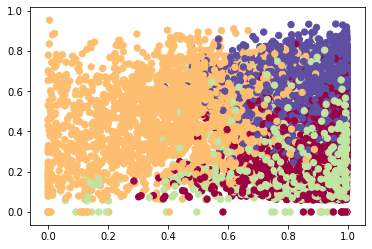

Termination criterion satisfied


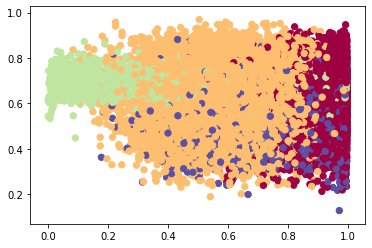

Termination criterion satisfied


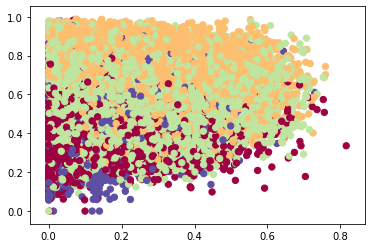

Termination criterion satisfied


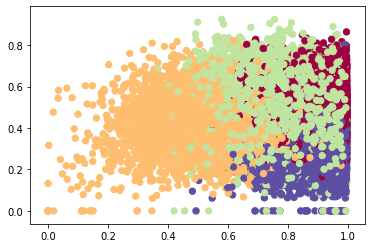

In [32]:
y_pred = list()
for i in range(0,4):
    Kmeans = KMeansClustering(np.array(cluster[i]), 4)
    y_pred.append(Kmeans.fit(np.array(cluster[i])))
    clusterdf[i].insert(12,'sub_cluster', y_pred[i])

In [33]:
clusterdf[3][clusterdf[3]['sub_cluster']==0]

,acousticness,name,danceability,tempo,loudness,popularity,key,energy,id,instrumentalness,liveness,speechiness,sub_cluster,valence,year,artists,genres,cluster_no
25,0.988,It Was a Lover and His Lass Roger Quilter & Jo...,0.540,0.001475,-0.003543,0.000000,0.001546,0.1020,6WBXyRc3ynwvRHiBWudVLo,0.000002,0.0819,0.0792,0.0,0.433,0.08,Roger Quilter,"['british modern classical', 'early modern cla...",3.0
31,0.995,Por una Mujer - Remasterizado Ignacio Corsini,0.531,0.002045,-0.004439,0.000000,0.000773,0.1240,6XoyWGdCJwFaJV1Pnmphwr,0.016800,0.1180,0.0711,0.0,0.555,0.08,Ignacio Corsini,"['tango', 'vintage tango']",3.0
102,0.989,Θεοδωράκης Γρίβας Αντώνης Διαμαντίδης,0.414,0.001501,-0.002017,0.000000,0.002705,0.2290,3zGslzrt12d41TKH7xBO5R,0.000670,0.1210,0.0587,0.0,0.325,0.10,Αντώνης Διαμαντίδης,[],3.0
117,0.991,Skliri Kardia Soula Karagiorgi,0.358,0.002274,-0.002594,0.000000,0.000773,0.3500,41uoJrpHQhmOAkcXtKsAk3,0.038700,0.3480,0.0392,0.0,0.305,0.10,Soula Karagiorgi,[],3.0
138,0.943,Alaniara Roza Eskenazi,0.354,0.002004,-0.001781,0.000000,0.000386,0.3870,44i8kWhXwKOcxXWNkW1IIc,0.008170,0.0674,0.0293,0.0,0.442,0.10,Roza Eskenazi,['rebetiko'],3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152973,0.879,Mr. Sellack The Roches,0.686,0.002619,-0.003598,0.001967,0.000773,0.0480,3TBeNvNMUHTRArg6EsceCo,0.000000,0.0755,0.0371,0.0,0.453,0.59,The Roches,"['folk', 'traditional folk']",3.0
152984,0.880,Baby's Request - Remastered 1993 Wings,0.741,0.001756,-0.003583,0.002158,0.002705,0.0875,7jhCzsxSDmdNgCsEsUk7xh,0.000000,0.1510,0.0512,0.0,0.578,0.59,Wings,"['album rock', 'art rock', 'beatlesque', 'clas...",3.0
153276,0.864,Give Yourself To Love - Live Kate Wolf,0.400,0.002651,-0.002884,0.001840,0.004251,0.1760,6XVjthJBc92UoF6Gs4F2gW,0.000000,0.7090,0.0322,0.0,0.409,0.63,Kate Wolf,"['contemporary folk', 'folk', 'traditional folk']",3.0
153452,0.915,Refrain Jose Mari Chan,0.396,0.001864,-0.002997,0.002602,0.004251,0.1500,617ayO0dFkBhN3KJ3LbABQ,0.186000,0.1820,0.0303,0.0,0.517,0.65,Jose Mari Chan,"['classic opm', 'manila sound', 'opm', 'soft r...",3.0


In [34]:
newdf1  = pd.concat([clusterdf[0],clusterdf[1],clusterdf[2],clusterdf[3]])

In [35]:
newdf1.to_csv("Kmeansfromscratch2.csv")

In [36]:
newdf1.shape

(156581, 18)